In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
fred = pd.read_csv(r"./data/FRED/FRED3_Entire_Database_2021.csv", low_memory=False, header=0, skiprows=range(1, 10), encoding="latin1")
meta = pd.read_csv(r"./data/FRED/FRED3_Column_Definitions_2021.csv", usecols=["column_id", "name", "units"], index_col="column_id")
lookup = pd.read_csv(r"./data/plantlookup.csv", low_memory=False, encoding="latin1", index_col=0)

In [3]:
COLLABORATION_GRADIENT_TRAITS = [
    "F00679", # RD
    "F00727", # SRL
    "F00718", #	Specific root area (SRA)
    "F00104", # RCT
    "F00622", # Mycorrhiza_Fraction root length colonized by AM mycorrhizae
    "F00626", # Mycorrhiza_Fraction root length colonized by EM mycorrhizae
    "F00638", # Mycorrhiza_Fraction of root length
    "F00645"  # Mycorrhiza_Type_Data
]

CONSERVATION_GRADIENT_TRAITS = [
    "F00709", # RTD
    "F00277", #	Root P content
    "F00261", # Root N content
    "F00358"  # Root lignin content
]

In [4]:
# meta[meta.name.str.contains("taxonomy")]

In [28]:
lookup

,family,order,group
genus,,,
Acorus,Acoraceae,Acorales,Angiosperms
Albidella,Alismataceae,Alismatales,Angiosperms
Alisma,Alismataceae,Alismatales,Angiosperms
Astonia,Alismataceae,Alismatales,Angiosperms
Baldellia,Alismataceae,Alismatales,Angiosperms
...,...,...,...
Ugena,Lygodiaceae,Schizaeales,Pteridophytes
Actinostachys,Schizaeaceae,Schizaeales,Pteridophytes
Lophidium,Schizaeaceae,Schizaeales,Pteridophytes


In [5]:
meta.query("name.str.contains('N', case=True)")

,name,units
column_id,,
F00002,Notes_Row ID,NaN
F00008,Notes_Site ID,NaN
F00027,Notes_Single or multiple species,NaN
F00059,Notes_Root order classification scheme,NaN
F00065,Notes_Method of determining dead roots,NaN
...,...,...
F01458,SE_Root N uptake_Hourly uptake of molar NH4+ p...,mg/g/h
F01459,Root N uptake_Hourly NO3- uptake per root mass,mg/g/h
F01460,SE_Root N uptake_Hourly NO3- uptake per root mass,mg/g/h


In [61]:
fred.columns[fred.columns.str.contains("282")]

Index(['F00282'], dtype='object')

In [64]:
fred.F00645.isna().mean()

np.float64(0.8291484525266655)

In [102]:
meta.loc[meta.name.str.contains("taxonom"), "name"]

column_id
F00017         Plant taxonomy_Family_Data source
F00018          Plant taxonomy_Genus_Data Source
F00019        Plant taxonomy_Species_Data source
F00020     Plant taxonomy_Subspecies_Data source
F01286         Plant taxonomy_Accepted genus_TPL
F01289        Plant taxonomy_Accepted family_TPL
F01290         Plant taxonomy_Accepted order_APW
F01291         Plant taxonomy_Accepted group_TPL
F01413    Plant taxonomy_Species name unresolved
Name: name, dtype: object

In [42]:
meta.loc["F00638", "name"]

'Mycorrhiza_Fraction of root length'

In [83]:
fred.shape

(57190, 1164)

In [6]:
# root traits of interest - 
# F00056 - root order

fred.loc[:, ["F00018", "F00019", "F00056"] + COLLABORATION_GRADIENT_TRAITS + 
                    CONSERVATION_GRADIENT_TRAITS].query("F00056.isin((1, 2, 3))")  # only choosing 1st, 2nd and 3rd order roots

,F00018,F00019,F00056,F00679,F00727,F00718,F00104,F00622,F00626,F00638,F00645,F00709,F00277,F00261,F00358
0,Dicranopteris,dichotoma,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AM,NaN,NaN,NaN,NaN
1,Dicranopteris,dichotoma,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AM,NaN,NaN,NaN,NaN
2,Dicranopteris,dichotoma,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AM,NaN,NaN,NaN,NaN
3,Cunninghamia,lanceolata,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AM,NaN,NaN,NaN,NaN
4,Cunninghamia,lanceolata,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AM,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57145,Vitis,vinifera,2.0,0.175183,0.0125,NaN,NaN,53.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57146,Vitis,vinifera,3.0,0.260983,0.0087,NaN,NaN,31.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57149,Vitis,vinifera,1.0,0.162800,0.0591,NaN,NaN,56.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57150,Vitis,vinifera,2.0,0.213133,0.0214,NaN,NaN,51.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
fred.loc[:, ["F00018", "F00019", "F00056"] + COLLABORATION_GRADIENT_TRAITS + CONSERVATION_GRADIENT_TRAITS].\
    query("F00056.isin((1, 2, 3))").isna().mean()

F00018    0.036351
F00019    0.070182
F00056    0.000000
F00679    0.325535
F00727    0.704877
F00718    0.959690
F00104    0.950693
F00622    0.992442
F00626    0.999640
F00638    0.993702
F00645    0.791794
F00709    0.780997
F00277    0.976606
F00261    0.716394
F00358    1.000000
dtype: float64

In [ ]:
# root diamater and specific root length !!!!!!!!

In [103]:
fred.query("F00018 == \"x Citrofortunella\"").loc[:, ["F00018", "F00019"]];

In [39]:
FRED_MISSPELT_GENERA = { # TF?????
     "Aglaria": "Aglaia",
     "Aporusa": "Aporosa",
     "Artrocarpus": "Artocarpus",
     "Atrocarpus": "Artocarpus",
     "Brosimun": "Brosimum",
     "Diospyrus": "Diospyros",
     "Gletitsia": "Gleditsia",
     "Parakmeria": "Magnolia", # synonym for Magnolia lotungensis
     "Paramichelia": "Magnolia", # synonym for Magnolia baillonii
     "Polyanthia": "Polyalthia",
     "Tabebuis": "Tabebuia",
     "Tabernamontana": "Tabernaemontana"
}

LOOKUP_MISSING_GENERA = {
    "Carrizo": "Rutaceae",
    "Cuoropita": "Lecythidaceae",
    "Tsoongiodendron": "Magnoliaceae",
    "Schizonepeta": "Lamiaceae",
    "Schyzolobium": "Fabaceae",
    "Swingle": "Rutaceae",
    "x Citrofortunella": "Rutaceae"
}

In [64]:
FAMILY_LOOKUP_TABLE = pd.Series(
    index=np.concatenate([lookup.index.values, list(LOOKUP_MISSING_GENERA.keys())]),
    data=np.concatenate([lookup.family.values, list(LOOKUP_MISSING_GENERA.values())])
)

In [65]:
FAMILY_LOOKUP_TABLE

Acorus                  Acoraceae
Albidella            Alismataceae
Alisma               Alismataceae
Astonia              Alismataceae
Baldellia            Alismataceae
                         ...     
Tsoongiodendron      Magnoliaceae
Schizonepeta            Lamiaceae
Schyzolobium             Fabaceae
Swingle                  Rutaceae
x Citrofortunella        Rutaceae
Length: 23286, dtype: object

## ___Root diameter___
----------------------

In [104]:
fred_fine_root_diameter = fred.loc[:, ["F00017", "F00018", "F00019", "F00056", "F00679", "F01290"]].\
                                    query("F00056.isin((1, 2, 3))").dropna(subset=["F00018", "F00679"])

# spelling correction
fred_fine_root_diameter.F00018 = fred_fine_root_diameter.F00018.apply(lambda genus:\
                                     FRED_MISSPELT_GENERA.get(genus) if\
                                         FRED_MISSPELT_GENERA.get(genus, None) else genus)

# update the family info
fred_fine_root_diameter.F00017 = FAMILY_LOOKUP_TABLE[fred_fine_root_diameter.F00018.str.strip()].values

In [110]:
fred_fine_root_diameter.isna().sum() # F00019 is the species name, so that's alright for now

F00017      0
F00018      0
F00019    183
F00056      0
F00679      0
F01290      0
dtype: int64

In [107]:
fred_fine_root_diameter.groupby(["F01290", "F00017", "F00018"]).count()

F00019  F00056  F00679
F01290        F00017         F00018                                 
Apiales       Apiaceae       Sanicula              1       1       1
              Araliaceae     Dendropanax           1       1       1
                             Eleutherococcus       1       1       1
                             Macropanax            1       1       1
                             Schefflera            2       2       2
...                                              ...     ...     ...
Zingiberales  Musaceae       Musa                  0      60      60
              Zingiberaceae  Alpinia               1       1       1
                             Amomum                1       1       1
Zygophyllales Zygophyllaceae Bulnesia              1       1       1
                             Guaiacum              1       1       1

[324 rows x 3 columns]

In [109]:
# orders and families
fred_fine_root_diameter.F01290.unique().size, fred_fine_root_diameter.F00017.unique().size

(45, 111)

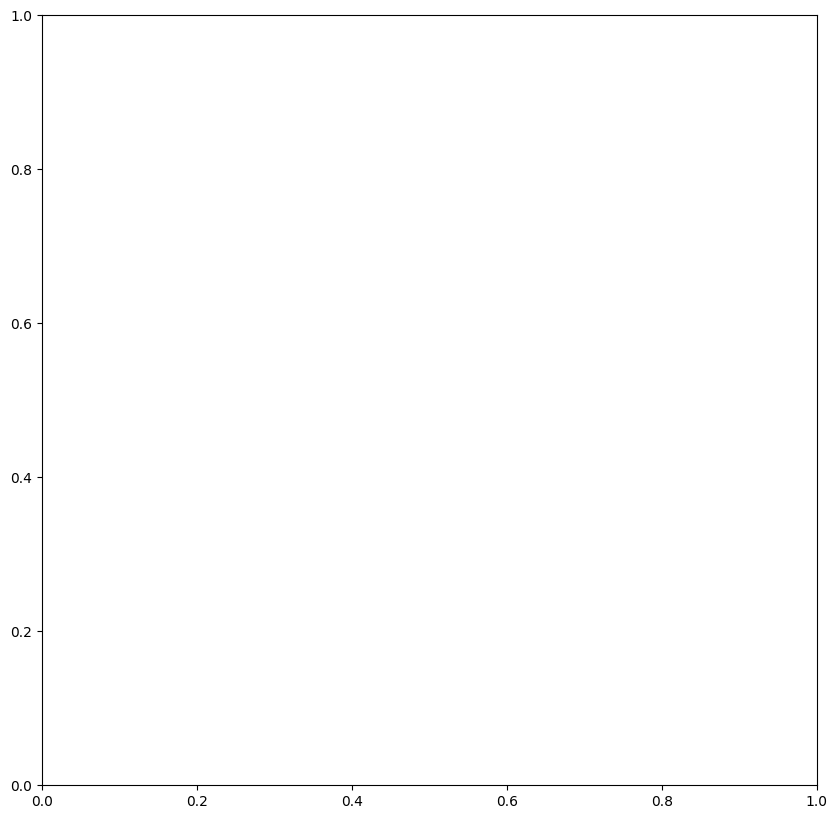

In [121]:
fig, axes = plt.subplots()
fig.set_size_inches(10, 10)

## ___Specific Root Length (SRL)___
---------------------

In [111]:
fred_fine_root_specific_root_length = fred.loc[:, ["F00017", "F00018", "F00019", "F00056", "F00727", "F01290"]].\
                                            query("F00056.isin((1, 2, 3))").dropna(subset=["F00018", "F00727"])

# spelling corrections for genus names
fred_fine_root_specific_root_length.F00018 = fred_fine_root_specific_root_length.F00018.apply(lambda genus:\
                                     FRED_MISSPELT_GENERA.get(genus) if\
                                         FRED_MISSPELT_GENERA.get(genus, None) else genus)

# update the families
fred_fine_root_specific_root_length.F00017 = FAMILY_LOOKUP_TABLE[fred_fine_root_specific_root_length.\
                                                    F00018.str.strip()].values

In [114]:
fred_fine_root_specific_root_length.isna().sum() # that's nice

F00017    0
F00018    0
F00019    0
F00056    0
F00727    0
F01290    0
dtype: int64

In [116]:
fred_fine_root_specific_root_length.groupby(["F01290", "F00017", "F00018"]).count()

F00019  F00056  F00727
F01290       F00017        F00018                                 
Apiales      Apiaceae      Sanicula              1       1       1
             Araliaceae    Dendropanax           1       1       1
                           Eleutherococcus       1       1       1
                           Macropanax            1       1       1
                           Schefflera            2       2       2
...                                            ...     ...     ...
Vitales      Vitaceae      Parthenocissus        1       1       1
                           Vitis                 2       2       2
                           Vitis                 9       9       9
Zingiberales Zingiberaceae Alpinia               1       1       1
                           Amomum                1       1       1

[250 rows x 3 columns]

In [117]:
# orders and families
fred_fine_root_specific_root_length.F01290.unique().size, fred_fine_root_specific_root_length.F00017.unique().size

(43, 100)